In [1]:
from smart_open import open
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis
import  matplotlib.pyplot as plt

In [2]:
df_tk_pre = pk.load( open( "./data/pre_df_tk.p", "rb" ) )

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df_tk_pre.head(5)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ptitle  pscore     pid  \
0  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
1  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
2  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
3  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
4  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   

                                               pbody      pcreated  \
0  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
1  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
2  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
3  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
4  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   

                                             comment       cauthor  \
0  [stop, sporting, winning, league, least, make,...        idek0k   
1  [dont, follow, liga, no, closely, portuguese, ...     kuzjaruge   
2  [go, porto, get, win, look, match, thread, pop...  TweakyWatson   
3  [shame, fan, allowed, stadium, think, would, l...   rabbitvinyl   
4  [juventusntus, take, easily, porto, fairly, de...    NunoxGames   

       ccreated       pcreated_date       ccreated_date     involved_teams  
0  1.613592e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto  
1  1.613590e+09 2021-02-17 14:07:53 2021-02-17 14:27:25  Juventus vs Porto  
2  1.613591e+09 2021-02-17 14:07:53 2021-02-17 14:36:02  Juventus vs Porto  
3  1.613596e+09 2021-02-17 14:07:53 2021-02-17 16:04:36  Juventus vs Porto  
4  1.613591e+09 2021-02-17 14:07:53 2021-02-17 14:41:04  Juventus vs Porto

# **By All**

## **Word Cloud**

In [4]:
all_words = ''
for comment in df_tk_pre['comment']:
    all_words += ','.join(list(comment)) 
# all_words

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
len(all_words)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


909205

In [6]:
wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=3, contour_color='steelblue')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
wordcloud.generate(all_words)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


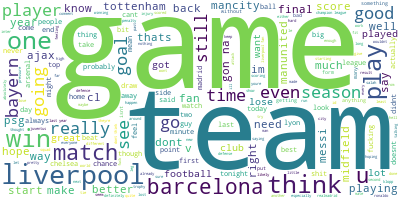

In [8]:
wordcloud.to_image()

## **Data Preparation**

In [9]:
all_words = []
for comment in df_tk_pre['comment']:
    all_words.append(comment)
# list(all_words)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Create dictionary and corpus
word2num = cp.Dictionary(all_words)
texts = all_words
word2num

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Get term frequency
corpus = [word2num.doc2bow(text) for text in texts]
# corpus

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model**

In [12]:
n_topics = 10
lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
doc_lda = lda_model[corpus]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
lda_model.print_topics()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.014*"like" + 0.010*"game" + 0.009*"would" + 0.009*"liverpool" + 0.008*"time" + 0.007*"go" + 0.007*"player" + 0.006*"team" + 0.006*"match" + 0.006*"u"'),
 (1,
  '0.018*"game" + 0.013*"think" + 0.012*"dont" + 0.011*"team" + 0.010*"liverpool" + 0.009*"one" + 0.009*"would" + 0.008*"like" + 0.008*"win" + 0.006*"see"'),
 (2,
  '0.017*"deleted" + 0.016*"game" + 0.009*"would" + 0.009*"like" + 0.008*"goal" + 0.007*"win" + 0.007*"think" + 0.006*"fan" + 0.006*"team" + 0.006*"madrid"'),
 (3,
  '0.024*"win" + 0.011*"liverpool" + 0.009*"match" + 0.009*"get" + 0.008*"team" + 0.007*"hope" + 0.007*"one" + 0.007*"im" + 0.006*"really" + 0.006*"would"'),
 (4,
  '0.012*"liverpool" + 0.012*"think" + 0.010*"goal" + 0.009*"mancity" + 0.008*"game" + 0.008*"one" + 0.008*"play" + 0.008*"away" + 0.006*"team" + 0.006*"win"'),
 (5,
  '0.011*"one" + 0.009*"time" + 0.008*"think" + 0.008*"season" + 0.008*"year" + 0.007*"player" + 0.007*"right" + 0.007*"like" + 0.007*"even" + 0.007*"goal"'),
 (6,
  '0.019*"te

In [14]:
for i in range(0, len(corpus), 500):
    for index, score in sorted(lda_model[corpus[i]], key=lambda tup: -1*tup[1]):
        print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Score: 0.509447455406189	 
Topic: 0.011*"liverpool" + 0.010*"think" + 0.008*"play" + 0.008*"ajax" + 0.008*"barcelona" + 0.008*"game" + 0.008*"would" + 0.007*"good" + 0.007*"win" + 0.007*"get"

Score: 0.4238225519657135	 
Topic: 0.011*"like" + 0.009*"http" + 0.008*"league" + 0.008*"win" + 0.008*"really" + 0.006*"great" + 0.006*"game" + 0.006*"team" + 0.006*"good" + 0.005*"best"

Score: 0.6402022242546082	 
Topic: 0.014*"like" + 0.010*"game" + 0.009*"would" + 0.009*"liverpool" + 0.008*"time" + 0.007*"go" + 0.007*"player" + 0.006*"team" + 0.006*"match" + 0.006*"u"

Score: 0.2982337176799774	 
Topic: 0.017*"game" + 0.013*"liverpool" + 0.010*"barcelona" + 0.009*"see" + 0.008*"win" + 0.008*"u" + 0.007*"league" + 0.007*"well" + 0.006*"last" + 0.006*"one"

Score: 0.8198962211608887	 
Topic: 0.014*"like" + 0.010*"game" + 0.009*"would" + 0.009*"liverpool" + 0.008*"time" + 0.007*"go" + 0.007*"player" + 0.006*"team" + 0.006*"match" + 0.006*"u"

Score: 0.020014649257063866	 
Topic: 0.011*"liverpoo

Topic: 0.012*"liverpool" + 0.012*"think" + 0.010*"goal" + 0.009*"mancity" + 0.008*"game" + 0.008*"one" + 0.008*"play" + 0.008*"away" + 0.006*"team" + 0.006*"win"

Score: 0.010012395679950714	 
Topic: 0.011*"one" + 0.009*"time" + 0.008*"think" + 0.008*"season" + 0.008*"year" + 0.007*"player" + 0.007*"right" + 0.007*"like" + 0.007*"even" + 0.007*"goal"

Score: 0.010012362152338028	 
Topic: 0.019*"team" + 0.010*"game" + 0.008*"good" + 0.008*"im" + 0.008*"time" + 0.008*"get" + 0.007*"going" + 0.007*"last" + 0.007*"like" + 0.007*"liverpool"

Score: 0.010012184269726276	 
Topic: 0.014*"like" + 0.010*"game" + 0.009*"would" + 0.009*"liverpool" + 0.008*"time" + 0.007*"go" + 0.007*"player" + 0.006*"team" + 0.006*"match" + 0.006*"u"

Score: 0.010011980310082436	 
Topic: 0.011*"like" + 0.009*"http" + 0.008*"league" + 0.008*"win" + 0.008*"really" + 0.006*"great" + 0.006*"game" + 0.006*"team" + 0.006*"good" + 0.005*"best"

Score: 0.010011866688728333	 
Topic: 0.011*"liverpool" + 0.010*"think" + 0.00

Topic: 0.018*"game" + 0.013*"think" + 0.012*"dont" + 0.011*"team" + 0.010*"liverpool" + 0.009*"one" + 0.009*"would" + 0.008*"like" + 0.008*"win" + 0.006*"see"

Score: 0.025080319494009018	 
Topic: 0.024*"win" + 0.011*"liverpool" + 0.009*"match" + 0.009*"get" + 0.008*"team" + 0.007*"hope" + 0.007*"one" + 0.007*"im" + 0.006*"really" + 0.006*"would"

Score: 0.02507970668375492	 
Topic: 0.011*"one" + 0.009*"time" + 0.008*"think" + 0.008*"season" + 0.008*"year" + 0.007*"player" + 0.007*"right" + 0.007*"like" + 0.007*"even" + 0.007*"goal"

Score: 0.025078458711504936	 
Topic: 0.012*"liverpool" + 0.012*"think" + 0.010*"goal" + 0.009*"mancity" + 0.008*"game" + 0.008*"one" + 0.008*"play" + 0.008*"away" + 0.006*"team" + 0.006*"win"

Score: 0.025077810510993004	 
Topic: 0.019*"team" + 0.010*"game" + 0.008*"good" + 0.008*"im" + 0.008*"time" + 0.008*"get" + 0.007*"going" + 0.007*"last" + 0.007*"like" + 0.007*"liverpool"

Score: 0.9249681830406189	 
Topic: 0.017*"deleted" + 0.016*"game" + 0.009*"wou

Topic: 0.017*"game" + 0.013*"liverpool" + 0.010*"barcelona" + 0.009*"see" + 0.008*"win" + 0.008*"u" + 0.007*"league" + 0.007*"well" + 0.006*"last" + 0.006*"one"

Score: 0.016672901809215546	 
Topic: 0.012*"liverpool" + 0.012*"think" + 0.010*"goal" + 0.009*"mancity" + 0.008*"game" + 0.008*"one" + 0.008*"play" + 0.008*"away" + 0.006*"team" + 0.006*"win"

Score: 0.01667279191315174	 
Topic: 0.011*"like" + 0.009*"http" + 0.008*"league" + 0.008*"win" + 0.008*"really" + 0.006*"great" + 0.006*"game" + 0.006*"team" + 0.006*"good" + 0.005*"best"

Score: 0.016672639176249504	 
Topic: 0.011*"liverpool" + 0.010*"think" + 0.008*"play" + 0.008*"ajax" + 0.008*"barcelona" + 0.008*"game" + 0.008*"would" + 0.007*"good" + 0.007*"win" + 0.007*"get"

Score: 0.016672180965542793	 
Topic: 0.011*"one" + 0.009*"time" + 0.008*"think" + 0.008*"season" + 0.008*"year" + 0.007*"player" + 0.007*"right" + 0.007*"like" + 0.007*"even" + 0.007*"goal"

Score: 0.6997792720794678	 
Topic: 0.024*"win" + 0.011*"liverpool" + 

## **Topic Analysis**

In [15]:
pyLDAvis.enable_notebook()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.019076  0.005480       1        1  21.594794
6     -0.015295  0.014456       2        1  13.609002
7     -0.013322  0.013696       3        1  10.636857
0     -0.014429  0.013073       4        1   9.789070
3     -0.012237 -0.004577       5        1   9.402900
2     -0.010836  0.039222       6        1   8.494088
4     -0.023786 -0.060028       7        1   7.838117
9     -0.020811 -0.056637       8        1   7.379899
5      0.005134  0.049722       9        1   7.205248
8      0.124657 -0.014408      10        1   4.050025, topic_info=        Term         Freq        Total Category  logprob  loglift
554  deleted   362.000000   362.000000  Default  30.0000  30.0000
32       win  1207.000000  1207.000000  Default  29.0000  29.0000
43      like  1069.000000  1069.000000  Default  28.0000  28.0000
578     http   221.000000   221.000000  Default  27.0000  27.0000
2     league   534.000000   534.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
70      play    18.984171   717.625454  Topic10  -5.7230  -0.4259
725  mancity    17.405601   513.824134  Topic10  -5.8098  -0.1786
557    final    16.847434   527.887509  Topic10  -5.8424  -0.2382
357    still    16.269030   429.567230  Topic10  -5.8773  -0.0671
123       im    16.130251   681.061121  Topic10  -5.8859  -0.5365

[865 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
11711      3  0.694721  aaaaaamiiiiiiiiiis
11226      7  0.725074          acceptance
3651       3  0.242542              active
3651      10  0.727625              active
403        1  0.256759            actually
...      ...       ...                 ...
2972       5  0.168073                   z
2972      10  0.672292                   z
9945       6  0.848457                zijn
11446      5  0.719274              zonder
8083       3  0.906579                   つ

[2561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 8, 1, 4, 3, 5, 10, 6, 9])

In [18]:
pyLDAvis.save_html(LDAvis_prepared,'./html/lda_n10.html')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# *By Teams Against*

## **Word Cloud**

In [19]:
df_tk_pre.columns

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ptitle', 'pscore', 'pid', 'pbody', 'pcreated', 'comment', 'cauthor',
       'ccreated', 'pcreated_date', 'ccreated_date', 'involved_teams'],
      dtype='object')

In [27]:
all_words = {}
all_words_str = {}
for team, comment in df_tk_pre.groupby('involved_teams')['comment']:
    all_words[team] = comment
    all_words_str[team] = ','.join(list(map(','.join, comment)))
# all_words_str

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Ajax vs Juventus


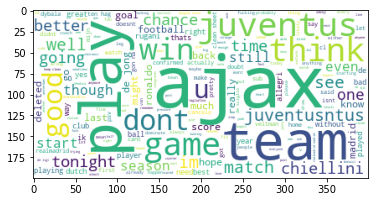


Ajax vs Liverpool


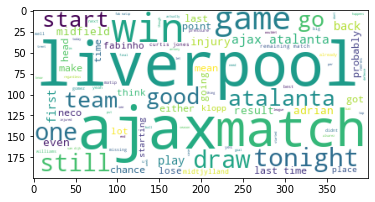


Ajax vs Tottenham


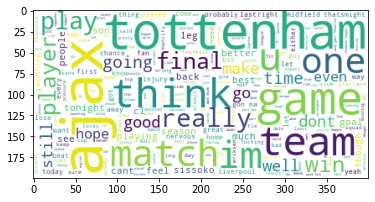


Arsenal vs Chelsea


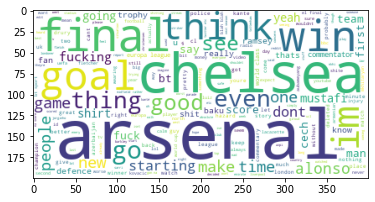


Arsenal vs ManCity


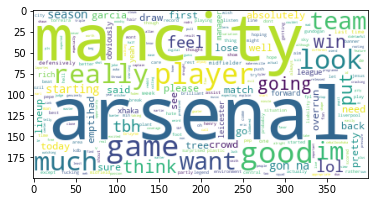


Arsenal vs ManUnited


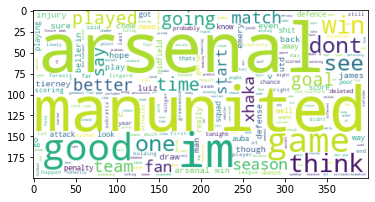


AtleticoMadrid vs Barcelona


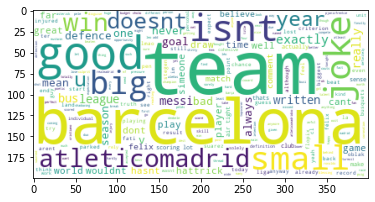


Barcelona vs Bayern


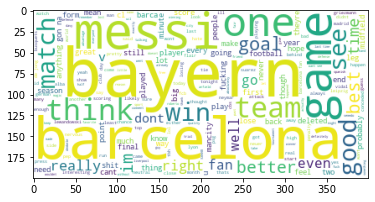


Barcelona vs Liverpool


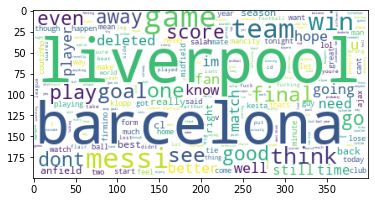


Barcelona vs Lyon


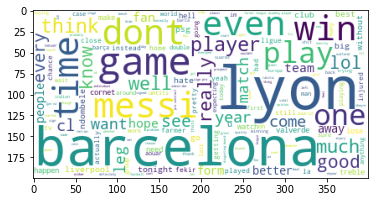


Barcelona vs ManUnited


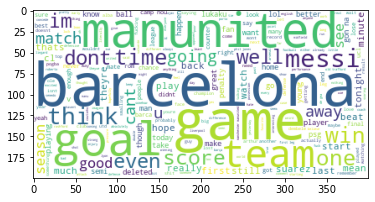


Barcelona vs Napoli


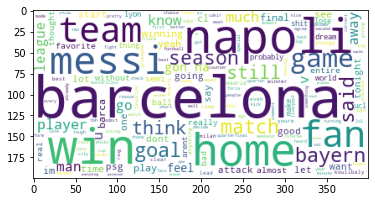


Barcelona vs RealMadrid


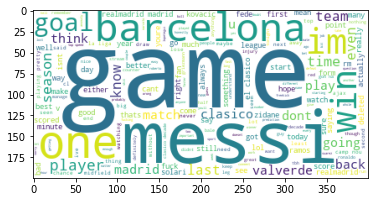


Bayern vs Chelsea


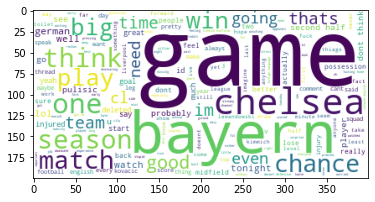


Bayern vs Liverpool


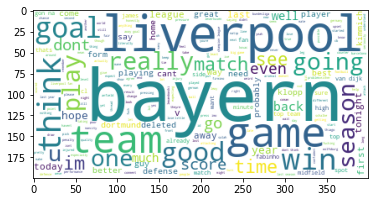


Bayern vs Lyon


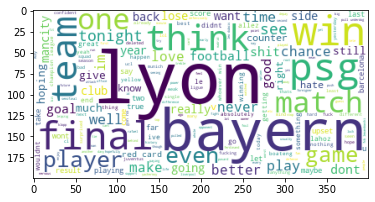


Bayern vs PSG


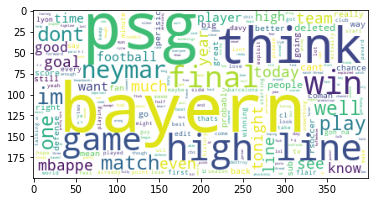


Chelsea vs Liverpool


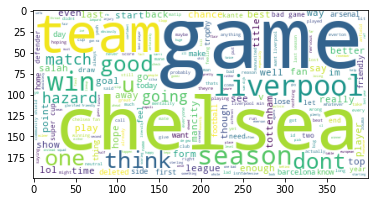


Chelsea vs ManUnited


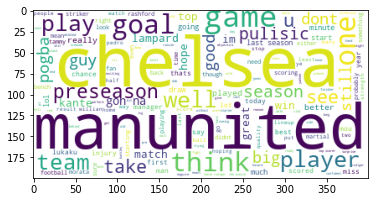


Dortmund vs PSG


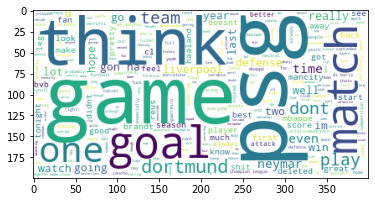


Dortmund vs Sevilla


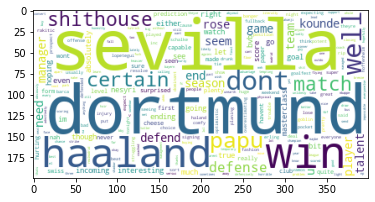


Inter vs Juventus


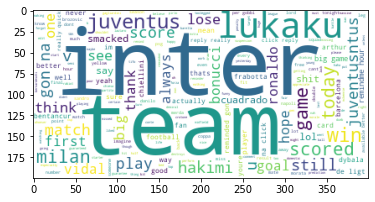


Inter vs Milan


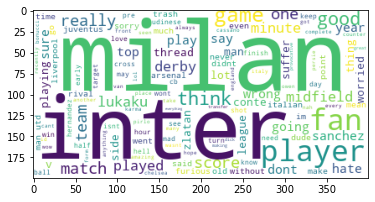


Inter vs RealMadrid


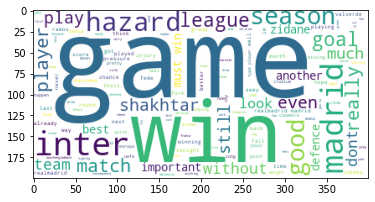


Inter vs Shakhtar


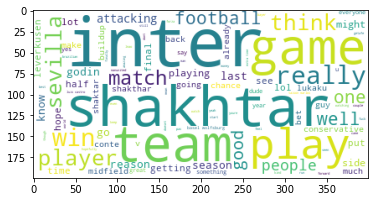


Juventus vs Napoli


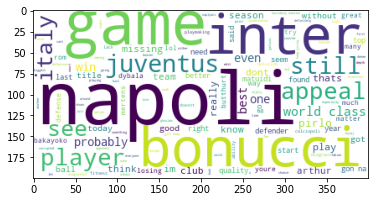


Juventus vs Porto


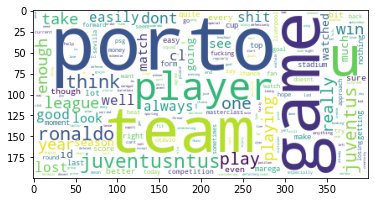


Juventus vs Roma


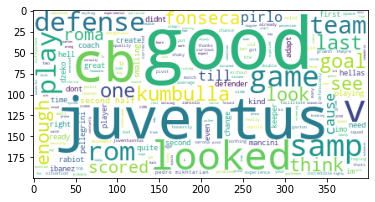


Leipzig vs Liverpool


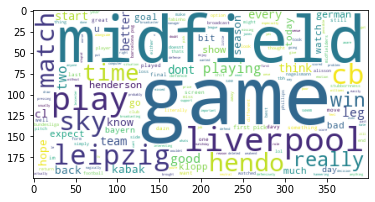


Leipzig vs PSG


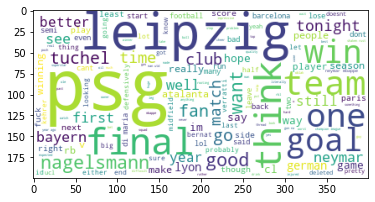


Liverpool vs ManCity


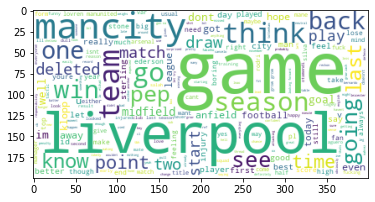


Liverpool vs ManUnited


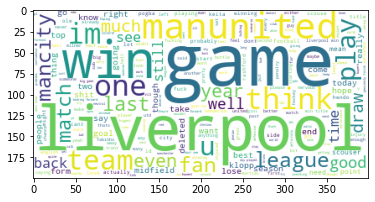


Liverpool vs RealMadrid


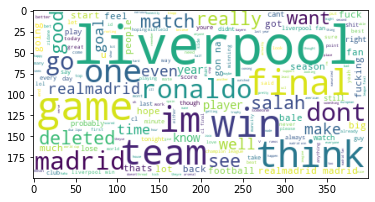


Liverpool vs Roma


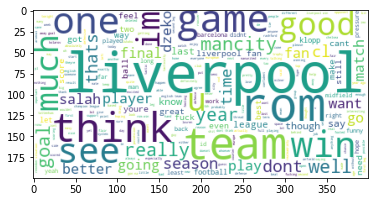


Liverpool vs Tottenham


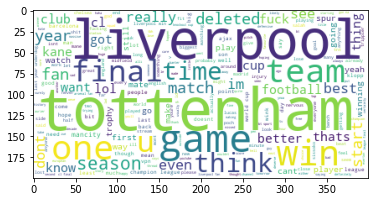


Lyon vs ManCity


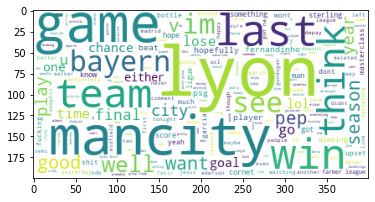


Lyon vs PSG


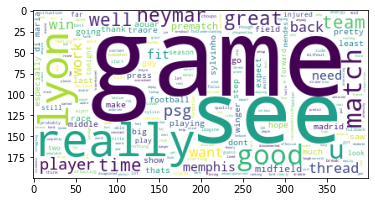


ManCity vs ManUnited


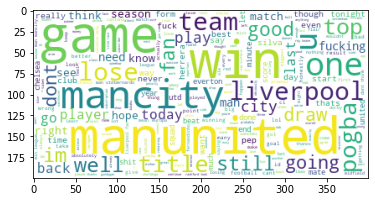


ManCity vs RealMadrid


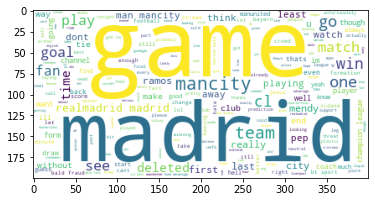


ManCity vs Tottenham


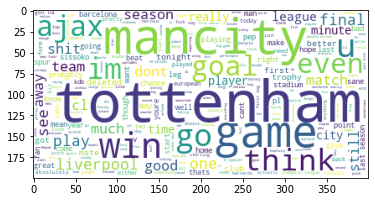


ManUnited vs Sevilla


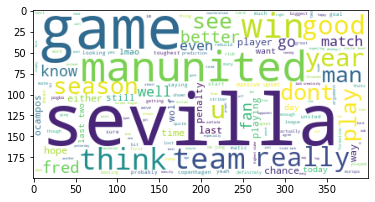

In [21]:
for key, value in all_words_str.items():
    print('\n' + key)
    wordcloud.generate(value)
    plt.imshow(wordcloud.to_image())
    plt.show()

## **LDA Function**

In [45]:
def get_matchup_lda(value, n):
    word2num = cp.Dictionary(value)
    texts = value
    corpus = [word2num.doc2bow(text) for text in texts]
    lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n)
    doc_lda = lda_model[corpus]
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, word2num)
    return LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
n = 5
for key, value in all_words.items():
    new_name = key.split('vs')
    new_name_str = new_name[0].replace(' ', '') + '_' + new_name[1].replace(' ', '')
    print(new_name_str)
    lda_html = get_matchup_lda(value=value, n=n)
    pyLDAvis.save_html(lda_html, './html/lda_n' + str(n) + new_name_str + '.html')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ajax_Juventus
Ajax_Liverpool
Ajax_Tottenham
Arsenal_Chelsea
Arsenal_ManCity
Arsenal_ManUnited
AtleticoMadrid_Barcelona
Barcelona_Bayern
Barcelona_Liverpool
Barcelona_Lyon
Barcelona_ManUnited
Barcelona_Napoli
Barcelona_RealMadrid
Bayern_Chelsea
Bayern_Liverpool
Bayern_Lyon
Bayern_PSG
Chelsea_Liverpool
Chelsea_ManUnited
Dortmund_PSG
Dortmund_Sevilla
Inter_Juventus
Inter_Milan
Inter_RealMadrid
Inter_Shakhtar
Juventus_Napoli
Juventus_Porto
Juventus_Roma
Leipzig_Liverpool
Leipzig_PSG
Liverpool_ManCity
Liverpool_ManUnited
Liverpool_RealMadrid
Liverpool_Roma
Liverpool_Tottenham
Lyon_ManCity
Lyon_PSG
ManCity_ManUnited
ManCity_RealMadrid
ManCity_Tottenham
ManUnited_Sevilla
